<a href="https://colab.research.google.com/github/Burak-Akca/Image-Classification/blob/main/Pizza-Steak-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import tqdm
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D,Dropout,Rescaling,RandomFlip,RandomRotation,RandomZoom
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import zipfile

In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-10-19 09:00:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   187MB/s    in 0.6s    

2024-10-19 09:00:00 (187 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [7]:
zip_ref=zipfile.ZipFile("pizza_steak.zip")

In [8]:
zip_ref.extractall()

In [9]:
zip_ref.close()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import tqdm
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D,Dropout,Rescaling,RandomFlip,RandomRotation,RandomZoom
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [21]:


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/pizza_steak/train",                # Verilerin bulunduğu dizin
    image_size=(256, 256),
    batch_size=32,
  validation_split=0.2,
    subset="training",          # Doğrulama veri seti olarak kullan
    seed=123,
                # Mini batch boyutu
)

Found 1500 files belonging to 2 classes.
Using 1200 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/pizza_steak/train",                # Verilerin bulunduğu dizin
    validation_split=0.2,
    subset="validation",          # Doğrulama veri seti olarak kullan
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

Found 1500 files belonging to 2 classes.
Using 300 files for validation.


In [78]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/pizza_steak/test",                # Verilerin bulunduğu dizin
    image_size=(256, 256),
    batch_size=32,
  shuffle=True
)

Found 500 files belonging to 2 classes.


In [24]:
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.1),

])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',         # İzlemek istediğiniz metrik
    patience=3,                 # Sabırlı kalınacak epoch sayısı
    restore_best_weights=True    # En iyi ağırlıkları geri yükle
)

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.keras',           # Modelin kaydedileceği dosya
    monitor='val_loss',        # İzlenecek metrik
    save_best_only=True,       # Sadece en iyi model kaydedilsin
    mode='min',                # Kayıt için en düşük değeri izleyin
    verbose=1                  # Kayıt işlemi hakkında bilgi yazdırma
)

In [27]:
model = Sequential()

model.add(Rescaling(1./255, input_shape=(256, 256, 3)))
model.add(data_augmentation)

model.add(Conv2D(100,(3, 3), activation = "relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(100,(3, 3), activation = "relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64,(3, 3), activation = "relu"))
#model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64,(3, 3), activation = "relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(.2))
#model.add(Dense(32, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 100)       │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 100)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 100)       │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 64)          │          57,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 58, 58, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 53824)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       3,444,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,634,405 (13.86 MB)

 Trainable params: 3,634,405 (13.86 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(train_ds, epochs = 10, validation_data=val_ds, verbose= 1,callbacks=[early_stopping,checkpoint])

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.5392 - loss: 0.7181
Epoch 1: val_loss improved from inf to 0.53925, saving model to best_model.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 299ms/step - accuracy: 0.5407 - loss: 0.7167 - val_accuracy: 0.7200 - val_loss: 0.5393
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.7299 - loss: 0.5679
Epoch 2: val_loss improved from 0.53925 to 0.44176, saving model to best_model.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.7303 - loss: 0.5674 - val_accuracy: 0.8000 - val_loss: 0.4418
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.7732 - loss: 0.4948
Epoch 3: val_loss improved from 0.44176 to 0.41312, saving model to best_model.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 192ms/step - accuracy: 0.7733 - loss: 0.4946 - val_accuracy: 0.8233 - val_loss: 0.4131
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.7768 - loss: 0.5132
Epoch 4: val_loss improved from 0.41312 to 0.39119, s

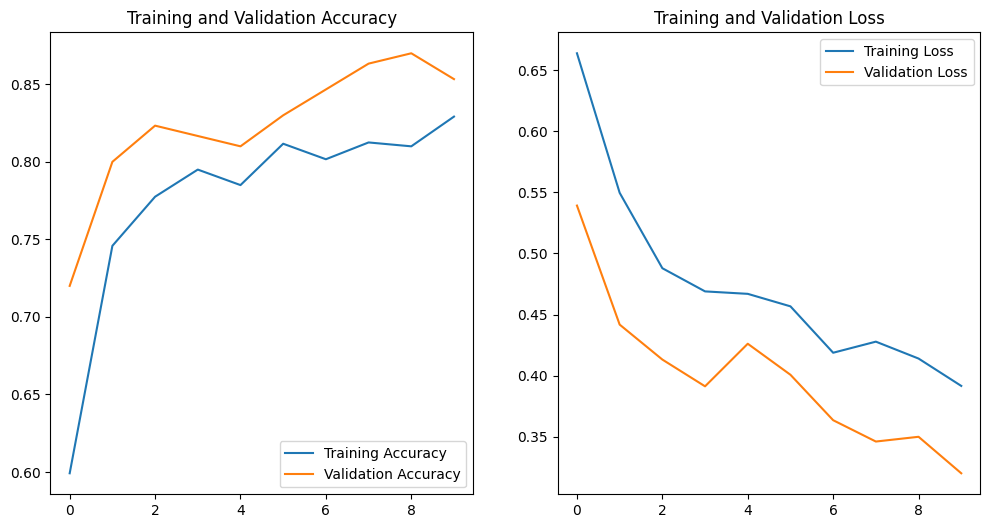

In [30]:
import matplotlib.pyplot as plt

# Eğitimin geçmişinden (history) kayıp ve doğruluk verilerini alın
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Doğruluk grafiği
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [81]:
model.predict(test_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


array([[0.77692676],
       [0.41204557],
       [0.08622597],
       [0.00684284],
       [0.93198895],
       [0.7045583 ],
       [0.9755417 ],
       [0.6238916 ],
       [0.64535034],
       [0.02608164],
       [0.08831333],
       [0.19710436],
       [0.83671147],
       [0.9417871 ],
       [0.9321579 ],
       [0.03019225],
       [0.16865094],
       [0.2617624 ],
       [0.06509785],
       [0.10958274],
       [0.19226214],
       [0.12656154],
       [0.05589747],
       [0.1316569 ],
       [0.29671276],
       [0.72886664],
       [0.9337062 ],
       [0.09613133],
       [0.637395  ],
       [0.9884347 ],
       [0.32908177],
       [0.1696957 ],
       [0.99317557],
       [0.9301488 ],
       [0.9994085 ],
       [0.90906155],
       [0.61518425],
       [0.10598901],
       [0.24513729],
       [0.23532765],
       [0.02707387],
       [0.7595656 ],
       [0.22275445],
       [0.913731  ],
       [0.26159784],
       [0.9480624 ],
       [0.5926265 ],
       [0.664

In [87]:
model.evaluate(test_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8750 - loss: 0.3157


[0.2937082052230835, 0.8820000290870667]

In [90]:
test_ds.class_names

['pizza', 'steak']

(32, 256, 256, 3)
[1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1]


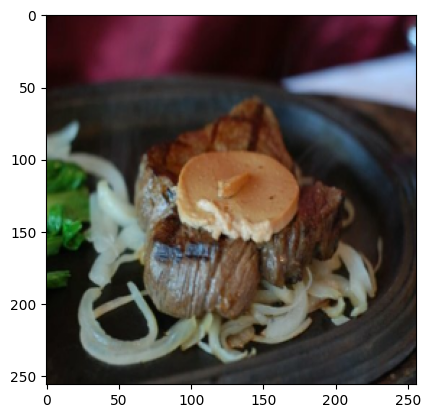

In [92]:
for image_batch,label_batch in test_ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    plt.imshow(image_batch[0].numpy().astype("uint8"))

In [65]:
from sklearn.metrics import confusion_matrix

image to predict
actual label: pizza
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
predicted label: pizza


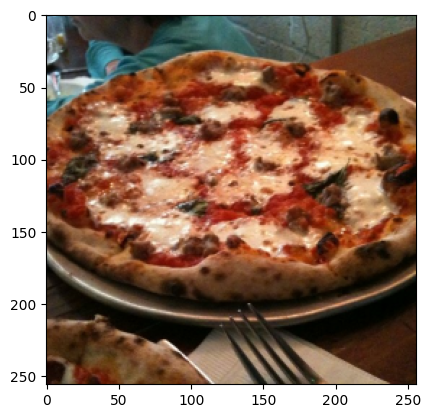

In [121]:
for image_batch,label_batch in test_ds.take(1):
    image=image_batch[4].numpy().astype("uint8")
    label=label_batch[4].numpy()
    print("image to predict")
    plt.imshow(image)
    print("actual label:",test_ds.class_names[label])
    batch_prediction=model.predict(image_batch)
    print("predicted label:",test_ds.class_names[label])


In [101]:
predictions

array([[0.99595034],
       [0.3642266 ],
       [0.13179763],
       [0.8360154 ],
       [0.14235456],
       [0.9742498 ],
       [0.7299414 ],
       [0.95896846],
       [0.10958274],
       [0.41927066],
       [0.05208023],
       [0.27672574],
       [0.9956512 ],
       [0.0634983 ],
       [0.16107626],
       [0.20383953],
       [0.7435645 ],
       [0.8538569 ],
       [0.22163734],
       [0.02178846],
       [0.76931477],
       [0.29671276],
       [0.15511559],
       [0.18725894],
       [0.9884347 ],
       [0.01719508],
       [0.957132  ],
       [0.7636866 ],
       [0.9755417 ],
       [0.22275445],
       [0.03388382],
       [0.87015784],
       [0.23869543],
       [0.01221139],
       [0.77692676],
       [0.04937769],
       [0.85763353],
       [0.02763867],
       [0.78450704],
       [0.5926265 ],
       [0.953637  ],
       [0.8463025 ],
       [0.07937209],
       [0.9832371 ],
       [0.913731  ],
       [0.35370305],
       [0.964631  ],
       [0.127